In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

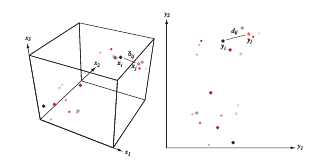

Fig.25: The distance between points in the original space are $δ_(ij)$ while in the projected space $d_(ij)$ . In practice, the source space is typically of very high dimension, and the mapped space of just two or three dimensions, to aid visualization. (In order to illustrate the correspondence between points in the two spaces, the size and color of each point $x_i$ matches that of its image $y_i$ .

# 10.14 Low-Dimensional Representations and Multidimensional Scaling (MDS)

In this section, we address the challenge of visualizing high-dimensional data. Multidimensional Scaling (MDS) is a technique used to represent data points in a lower-dimensional space such that the distances between points in this space correspond to the dissimilarities between points in the original space.

## Problem Overview

Consider a set of $ n $ data points $ x_1, x_2, \dots, x_n $. We wish to represent these points as $ y_1, y_2, \dots, y_n $ in a lower-dimensional space. Let $ \delta_{ij} $ represent the distance between the points $ x_i $ and $ x_j $, and $ d_{ij} $ represent the distance between the points $ y_i $ and $ y_j $ in the lower-dimensional space. 

The goal of MDS is to find a configuration of points $ y_1, \dots, y_n $ such that the distances $ d_{ij} $ in the lower-dimensional space are as close as possible to the original distances $ \delta_{ij} $.

## Objective Function

Since it is unlikely to find an exact correspondence between the distances $ d_{ij} $ and $ \delta_{ij} $ for all pairs of points, we use a criterion to evaluate how well the distances are preserved. A common objective function is the **sum of squared errors**:

### Sum of Squared Errors:
$$
J_{ee} = \sum_{i < j} (d_{ij} - \delta_{ij})^2
$$
Alternatively, we can emphasize the fractional errors (relative errors) using:

### Fractional Error Function:
$$
J_{ff} = \sum_{i < j} \frac{(d_{ij} - \delta_{ij})^2}{\delta_{ij}^2}
$$
A compromise between these two criteria can be achieved using:

### Error Function with Both Error and Fractional Error:
$$
J_{ef} = \sum_{i < j} \frac{(d_{ij} - \delta_{ij})^2}{\delta_{ij}^2} \cdot \delta_{ij}
$$

These functions emphasize different aspects of the errors in the distances between points in the lower-dimensional space.

## Gradient of the Objective Function

The objective function can be minimized using **gradient descent**. The gradient of the error functions with respect to the coordinates $ y_k $ of the points is straightforward to compute. For each of the criteria, we compute the gradient of the error with respect to the coordinates of a point $ y_k $:

### Gradient of $ J_{ee} $:
$$
\nabla_{y_k} J_{ee} = 2 \sum_{i \neq k} (d_{kj} - \delta_{kj}) \frac{y_k - y_j}{d_{kj}}
$$

### Gradient of $ J_{ff} $:
$$
\nabla_{y_k} J_{ff} = 2 \sum_{i \neq k} \frac{(d_{kj} - \delta_{kj})}{\delta_{kj}} \frac{y_k - y_j}{d_{kj}^2}
$$

### Gradient of $ J_{ef} $:
$$
\nabla_{y_k} J_{ef} = 2 \sum_{i \neq k} \frac{(d_{kj} - \delta_{kj})}{\delta_{kj}} \frac{y_k - y_j}{d_{kj}}
$$

## Gradient Descent Optimization

Once the objective function and its gradient are defined, we use gradient descent to update the positions of the points in the lower-dimensional space. We start with an initial random configuration of points and iteratively update their positions in the direction of the negative gradient.

### Gradient Descent Update Rule:
$$
y_k^{new} = y_k^{old} - \alpha \nabla_{y_k} J
$$
Where $ \alpha $ is the learning rate.

## Choosing the Initial Configuration

The initial configuration can be chosen randomly or using a heuristic, such as spreading the points uniformly in the lower-dimensional space. The quality of the resulting configuration is highly dependent on the starting configuration and the number of iterations in the gradient descent procedure.

## Practical Considerations

- **Dimensionality**: In practice, MDS is often applied to reduce data to 2 or 3 dimensions for visualization purposes.
- **Complexity**: MDS can become computationally expensive when the number of data points is large. However, it provides a powerful tool for dimensionality reduction and visualization in cases where distance or dissimilarity is meaningful.
- **Alternatives**: Other dimensionality reduction techniques, such as PCA (Principal Component Analysis) or t-SNE, can also be used depending on the specific application and the nature of the data.

---

In summary, **Multidimensional Scaling (MDS)** is a valuable technique for visualizing high-dimensional data in a lower-dimensional space, and gradient descent is often used to find the optimal configuration of points that preserve the distances between them as accurately as possible.



Converged at iteration 98


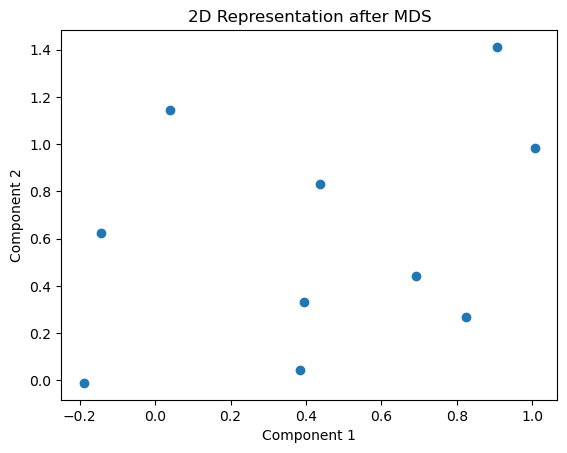

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Euclidean distance matrix
def compute_distance_matrix(X):
    n = X.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(X[i] - X[j])
            dist_matrix[i, j] = dist_matrix[j, i] = dist
    return dist_matrix

# Objective Function: Sum of Squared Errors (Jee)
def objective_function(d, delta):
    return np.sum((d - delta) ** 2)

# Gradient Descent to minimize the objective function
def mds(X, n_components=2, max_iter=300, tol=1e-6):
    n = X.shape[0]
    
    # Step 1: Compute the pairwise distance matrix for the original data
    delta = compute_distance_matrix(X)
    
    # Step 2: Initialize the low-dimensional points randomly
    Y = np.random.rand(n, n_components)
    
    # Step 3: Gradient descent to minimize the objective function
    prev_obj_val = np.inf
    for iter in range(max_iter):
        # Compute the pairwise distances in the lower-dimensional space
        dist_matrix = np.linalg.norm(Y[:, np.newaxis] - Y, axis=2)
        
        # Compute the gradient of the objective function with respect to Y
        gradient = np.zeros_like(Y)
        for i in range(n):
            for j in range(i + 1, n):
                if dist_matrix[i, j] == 0:
                    continue
                grad_ij = (dist_matrix[i, j] - delta[i, j]) / dist_matrix[i, j] * (Y[i] - Y[j])
                gradient[i] += grad_ij
                gradient[j] -= grad_ij
        
        # Update the points based on the gradient
        Y -= 0.1 * gradient
        
        # Calculate the objective value (error)
        obj_val = objective_function(dist_matrix, delta)
        
        # If the change in the objective function is below the tolerance, stop
        if np.abs(prev_obj_val - obj_val) < tol:
            print(f"Converged at iteration {iter}")
            break
        
        prev_obj_val = obj_val
    
    return Y

# Generate some synthetic data (high-dimensional points)
np.random.seed(42)
X = np.random.rand(10, 5)  # 10 points in 5-dimensional space

# Perform MDS to reduce the data to 2 dimensions
Y = mds(X, n_components=2)

# Plot the results
plt.scatter(Y[:, 0], Y[:, 1], marker='o')
plt.title("2D Representation after MDS")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


Converged at iteration 131


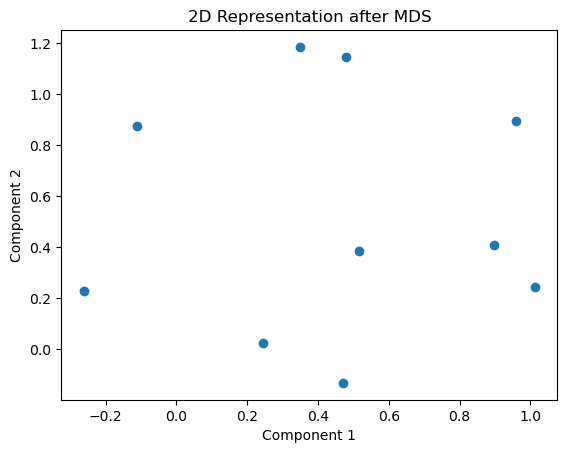

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Function to compute the Euclidean distance matrix
def compute_distance_matrix(X):
    n = len(X)
    dist_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = math.sqrt(sum((X[i][k] - X[j][k]) ** 2 for k in range(len(X[i]))))
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

# Objective Function: Sum of Squared Errors (Jee)
def objective_function(d, delta):
    n = len(d)
    error = 0
    for i in range(n):
        for j in range(i + 1, n):
            error += (d[i][j] - delta[i][j]) ** 2
    return error

# Gradient Descent to minimize the objective function
def mds(X, n_components=2, max_iter=300, tol=1e-6):
    n = len(X)
    
    # Step 1: Compute the pairwise distance matrix for the original data
    delta = compute_distance_matrix(X)
    
    # Step 2: Initialize the low-dimensional points randomly
    Y = [[random.random() for _ in range(n_components)] for _ in range(n)]
    
    # Step 3: Gradient descent to minimize the objective function
    prev_obj_val = float('inf')
    for iter in range(max_iter):
        # Compute the pairwise distances in the lower-dimensional space
        dist_matrix = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(i + 1, n):
                dist = math.sqrt(sum((Y[i][k] - Y[j][k]) ** 2 for k in range(n_components)))
                dist_matrix[i][j] = dist_matrix[j][i] = dist
        
        # Compute the gradient of the objective function with respect to Y
        gradient = [[0] * n_components for _ in range(n)]
        for i in range(n):
            for j in range(i + 1, n):
                if dist_matrix[i][j] == 0:
                    continue
                grad_ij = (dist_matrix[i][j] - delta[i][j]) / dist_matrix[i][j]
                for k in range(n_components):
                    gradient[i][k] += grad_ij * (Y[i][k] - Y[j][k])
                    gradient[j][k] -= grad_ij * (Y[i][k] - Y[j][k])
        
        # Update the points based on the gradient
        learning_rate = 0.1
        for i in range(n):
            for k in range(n_components):
                Y[i][k] -= learning_rate * gradient[i][k]
        
        # Calculate the objective value (error)
        obj_val = objective_function(dist_matrix, delta)
        
        # If the change in the objective function is below the tolerance, stop
        if abs(prev_obj_val - obj_val) < tol:
            print(f"Converged at iteration {iter}")
            break
        
        prev_obj_val = obj_val
    
    return Y

# Generate some synthetic data (high-dimensional points)
random.seed(42)
X = [[random.random() for _ in range(5)] for _ in range(10)]  # 10 points in 5-dimensional space

# Perform MDS to reduce the data to 2 dimensions
Y = mds(X, n_components=2)

# Plot the results
plt.scatter([point[0] for point in Y], [point[1] for point in Y], marker='o')
plt.title("2D Representation after MDS")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


## Low-Dimensional Representations and Multidimensional Scaling (MDS)

One of the challenges in clustering is the inability to visualize the structure of multidimensional data. This issue becomes more pronounced when dissimilarity measures are used that do not exhibit the properties of a traditional distance. To address this, we can represent the data points in a lower-dimensional space such that the distances between points in this new space correspond to the dissimilarities between points in the original space.

If we are dealing with $n$ samples $x_1, x_2, \dots, x_n$ and their respective lower-dimensional representations $y_1, y_2, \dots, y_n$, the goal is to find a configuration of the $y_i$'s such that the distances $d_{ij}$ between the $y_i$'s approximate the dissimilarities $\delta_{ij}$ between the $x_i$'s. These dissimilarities can be calculated using various criteria. A common approach involves minimizing the sum of squared errors between the distances in the lower-dimensional space and the original distances:

$$
J_{\text{ee}} = \sum_{i<j} (d_{ij} - \delta_{ij})^2 \quad \text{(Eq. 103)}
$$

where \(d_{ij}\) represents the distance between points $y_i$ and $y_j$ in the lower-dimensional space, and $\delta_{ij}$ represents the dissimilarity between the points $x_i$ and $x_j$ in the original space.

A more sophisticated criterion that normalizes the errors is the **fractional error**:

$$
J_{\text{ff}} = \sum_{i<j} \frac{(d_{ij} - \delta_{ij})^2}{\delta_{ij}^2} \quad \text{(Eq. 104)}
$$

Alternatively, a **compromise function** that combines the absolute error and the fractional error is given by:

$$
J_{\text{ef}} = \sum_{i<j} \frac{(d_{ij} - \delta_{ij})^2}{\delta_{ij}} \quad \text{(Eq. 105)}
$$

Once a criterion function is chosen, the optimal configuration $y_1, y_2, \dots, y_n$ is found by minimizing the chosen objective function using gradient descent.

### Monotonicity Constraint in Non-Metric MDS

In **non-metric MDS**, the dissimilarities \(\delta_{ij}\) do not necessarily represent true distances but instead reflect the relative ranking of dissimilarities. In this case, the goal is to find a configuration such that the rank order of the distances in the lower-dimensional space matches the rank order of the dissimilarities in the original space.

To achieve this, we can define a monotonicity constraint on the distances in the lower-dimensional space:

$$
\delta_{i1,j1} \leq \delta_{i2,j2} \leq \dots \leq \delta_{im,jm} \quad \text{(Eq. 106)}
$$

This constraint ensures that the rank order of the distances $d_{ij}$ in the lower-dimensional space matches that of the dissimilarities $\delta_{ij}$.

The degree to which the lower-dimensional distances satisfy this monotonicity constraint is measured by the **monotonicity criterion**:

$$
J_{\text{mon}} = \frac{1}{2} \sum_{i<j} (d_{ij} - \hat{d}_{ij})^2 \quad \text{(Eq. 107)}
$$

where $\hat{d}_{ij}$ is the distance in the lower-dimensional space that satisfies the monotonicity constraint. 

To make this criterion invariant to translations, rotations, and dilations of the configuration, we normalize it as follows:

$$
J_{\text{mon}} = \frac{J_{\text{mon}}}{\sum_{i<j} d_{ij}} \quad \text{(Eq. 108)}
$$

This normalized version of the monotonicity criterion allows us to compare different configurations in a way that is independent of the scaling of the data.

### Observations

In practice, when the number of points exceeds the dimensionality of the image space, the monotonicity constraint becomes quite restrictive. This is due to the fact that the number of constraints grows quadratically with the number of points. Despite this, it has been observed that the monotonicity constraint is useful in recovering metric information from non-metric data. 

Moreover, it is generally observed that increasing the dimensionality of the image space can improve the quality of the representation. While 2D and 3D configurations are common for visualization, higher dimensions may be necessary to minimize the value of$(J_{\text{mon}}$ to an acceptable level.

The procedure allows the recovery of meaningful structures in data, which can subsequently be used for various clustering and analysis techniques in metric spaces.


In [3]:
import random
import math

# Function to compute the pairwise Euclidean distance matrix for a set of points
def compute_distances(points):
    n = len(points)
    dist_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            dist = math.sqrt(sum((points[i][k] - points[j][k]) ** 2 for k in range(len(points[0]))))
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

# Function to calculate the error criterion (Jef function)
def compute_jef_error(dist_original, dist_projected):
    error = 0
    n = len(dist_original)
    for i in range(n):
        for j in range(i+1, n):
            # Jef criterion: sum of squared errors of distances
            error += (dist_projected[i][j] - dist_original[i][j]) ** 2 / dist_original[i][j]**2
    return error

# Gradient descent step to minimize the error
def gradient_descent_step(Y, dist_original, learning_rate=0.1):
    n = len(Y)
    m = len(Y[0])  # Dimension of the space to project into
    grad = [[0 for _ in range(m)] for _ in range(n)]
    
    # Compute the pairwise distances in the projected space
    dist_projected = compute_distances(Y)

    # Calculate the gradient for each point in the configuration
    for i in range(n):
        for j in range(i+1, n):
            # Compute the gradient for each point
            d_ij = dist_projected[i][j]
            delta_ij = dist_original[i][j] - d_ij
            # Gradients are computed for each pair of points
            for k in range(m):
                grad[i][k] += (Y[i][k] - Y[j][k]) * delta_ij / d_ij

    # Update the configuration Y using the gradient
    for i in range(n):
        for k in range(m):
            Y[i][k] -= learning_rate * grad[i][k]

    return Y

# Perform multidimensional scaling using gradient descent
def mds(data, num_dimensions=2, max_iter=100, learning_rate=0.01):
    # Step 1: Compute the original pairwise distance matrix
    dist_original = compute_distances(data)

    # Step 2: Initialize the configuration of points in the target space randomly
    n = len(data)
    Y = [[random.uniform(-1, 1) for _ in range(num_dimensions)] for _ in range(n)]
    
    # Step 3: Iteratively update the configuration to minimize the error
    for _ in range(max_iter):
        Y = gradient_descent_step(Y, dist_original, learning_rate)

    return Y

# Example: 3D spiral data
spiral_data = [
    [math.cos(k / 2), math.sin(k / 2), k / 2] for k in range(30)
]

# Perform MDS to project into 2D
mds_result = mds(spiral_data, num_dimensions=2, max_iter=500, learning_rate=0.01)

# Print the result (coordinates in the 2D space)
for point in mds_result:
    print(point)


[7391278.464043276, -1809976.8261888996]
[7391277.7966009565, -1809977.0571896613]
[7391278.417138157, -1809976.9423707856]
[7391278.12569581, -1809976.8220959266]
[7391278.523167908, -1809977.0237603078]
[7391278.490715347, -1809977.00521742]
[7391278.305470076, -1809977.3394591538]
[7391278.334721887, -1809976.8768091633]
[7391278.346679329, -1809977.0768426962]
[7391278.3270401405, -1809976.878210134]
[7391278.368647595, -1809976.8869905549]
[7391278.386292026, -1809977.0606812965]
[7391278.37588573, -1809977.0747526041]
[7391278.411448184, -1809977.0297933673]
[7391278.404089373, -1809977.0187106426]
[7391278.4099494675, -1809976.9522473903]
[7391278.424818886, -1809976.9758460857]
[7391278.435327999, -1809976.9923953654]
[7391278.437404178, -1809976.987565867]
[7391278.455021455, -1809976.982702737]
[7391278.674721348, -1809976.9625820606]
[7391279.375210273, -1809977.029663354]
[7391281.070113099, -1809977.7161440444]
[7282344.935393631, -1910444.001484488]
[-12727288.044188483, 